In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [5]:
API_KEY=os.getenv("API_KEY")

In [3]:
url = "https://yahoo-weather5.p.rapidapi.com/weather"

querystring = {"location":"ahmedabad","format":"json","u":"f"}

headers = {
	"x-rapidapi-key": "{API_KEY}",
	"x-rapidapi-host": "yahoo-weather5.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data=response.json()

In [4]:
print(data)

{'location': {'city': 'Ahmedabad', 'woeid': 2295402, 'country': 'India', 'lat': 23.030809, 'long': 72.591751, 'timezone_id': 'Asia/Kolkata'}, 'current_observation': {'pubDate': 1740259420, 'wind': {'chill': 67, 'direction': 'NNW', 'speed': 7}, 'atmosphere': {'humidity': 52, 'visibility': 4.97, 'pressure': 1016.6}, 'astronomy': {'sunrise': '7:07 AM', 'sunset': '6:40 PM'}, 'condition': {'temperature': 69, 'text': 'Clear', 'code': 31}}, 'forecasts': [{'day': 'Sun', 'date': 1740240000, 'high': 94, 'low': 64, 'text': 'Sunny', 'code': 32}, {'day': 'Mon', 'date': 1740326400, 'high': 94, 'low': 63, 'text': 'Haze', 'code': 21}, {'day': 'Tue', 'date': 1740412800, 'high': 96, 'low': 70, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Wed', 'date': 1740499200, 'high': 97, 'low': 69, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Thu', 'date': 1740585600, 'high': 94, 'low': 66, 'text': 'Partly Cloudy', 'code': 30}, {'day': 'Fri', 'date': 1740672000, 'high': 94, 'low': 70, 'text': 'Haze', 'code': 21}

In [9]:
location_info=data.get('location',{})
forecast_list=data.get('forecasts',[])
wind_data=data.get('current_observation',{}).get("wind",{})

In [10]:
forecast_list

[{'day': 'Sun',
  'date': 1740240000,
  'high': 94,
  'low': 64,
  'text': 'Sunny',
  'code': 32},
 {'day': 'Mon',
  'date': 1740326400,
  'high': 94,
  'low': 63,
  'text': 'Haze',
  'code': 21},
 {'day': 'Tue',
  'date': 1740412800,
  'high': 96,
  'low': 70,
  'text': 'Partly Cloudy',
  'code': 30},
 {'day': 'Wed',
  'date': 1740499200,
  'high': 97,
  'low': 69,
  'text': 'Partly Cloudy',
  'code': 30},
 {'day': 'Thu',
  'date': 1740585600,
  'high': 94,
  'low': 66,
  'text': 'Partly Cloudy',
  'code': 30},
 {'day': 'Fri',
  'date': 1740672000,
  'high': 94,
  'low': 70,
  'text': 'Haze',
  'code': 21},
 {'day': 'Sat',
  'date': 1740758400,
  'high': 94,
  'low': 69,
  'text': 'Mostly Cloudy',
  'code': 28},
 {'day': 'Sun',
  'date': 1740844800,
  'high': 93,
  'low': 65,
  'text': 'Sunny',
  'code': 32},
 {'day': 'Mon',
  'date': 1740931200,
  'high': 93,
  'low': 67,
  'text': 'Partly Cloudy',
  'code': 30},
 {'day': 'Tue',
  'date': 1741017600,
  'high': 95,
  'low': 64,
  'tex

In [11]:
df=pd.DataFrame(forecast_list)

In [15]:
wind_data

{'chill': 67, 'direction': 'NNW', 'speed': 7}

In [12]:
df

,day,date,high,low,text,code
0,Sun,1740240000,94,64,Sunny,32
1,Mon,1740326400,94,63,Haze,21
2,Tue,1740412800,96,70,Partly Cloudy,30
3,Wed,1740499200,97,69,Partly Cloudy,30
4,Thu,1740585600,94,66,Partly Cloudy,30
5,Fri,1740672000,94,70,Haze,21
6,Sat,1740758400,94,69,Mostly Cloudy,28
7,Sun,1740844800,93,65,Sunny,32
8,Mon,1740931200,93,67,Partly Cloudy,30
9,Tue,1741017600,95,64,Partly Cloudy,30


In [16]:
df["wind_speed"]=wind_data.get("speed",None)
df["wind_direction"]=wind_data.get("direction",None)
df["wind_chill"]=wind_data.get("chill",None)


In [17]:
df

,day,date,high,low,text,code,wind_speed,wind_direction,wind_chill
0,Sun,1740240000,94,64,Sunny,32,7,NNW,67
1,Mon,1740326400,94,63,Haze,21,7,NNW,67
2,Tue,1740412800,96,70,Partly Cloudy,30,7,NNW,67
3,Wed,1740499200,97,69,Partly Cloudy,30,7,NNW,67
4,Thu,1740585600,94,66,Partly Cloudy,30,7,NNW,67
5,Fri,1740672000,94,70,Haze,21,7,NNW,67
6,Sat,1740758400,94,69,Mostly Cloudy,28,7,NNW,67
7,Sun,1740844800,93,65,Sunny,32,7,NNW,67
8,Mon,1740931200,93,67,Partly Cloudy,30,7,NNW,67
9,Tue,1741017600,95,64,Partly Cloudy,30,7,NNW,67


In [18]:
df['date']=pd.to_datetime(df['date'],unit='s')
df['date']=pd.to_datetime(df['date']).dt.date
df.rename(columns={'high':'max_temp','low':'min_temp','text':'weather_condition'},inplace=True)

In [19]:
df['max_temp']=(df['max_temp'] - 32 ) * 5.0/9.0
df['min_temp']=(df['min_temp'] - 32 ) * 5.0/9.0

In [20]:
df.head()

,day,date,max_temp,min_temp,weather_condition,code,wind_speed,wind_direction,wind_chill
0,Sun,2025-02-22,34.444444,17.777778,Sunny,32,7,NNW,67
1,Mon,2025-02-23,34.444444,17.222222,Haze,21,7,NNW,67
2,Tue,2025-02-24,35.555556,21.111111,Partly Cloudy,30,7,NNW,67
3,Wed,2025-02-25,36.111111,20.555556,Partly Cloudy,30,7,NNW,67
4,Thu,2025-02-26,34.444444,18.888889,Partly Cloudy,30,7,NNW,67


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                11 non-null     object 
 1   date               11 non-null     object 
 2   max_temp           11 non-null     float64
 3   min_temp           11 non-null     float64
 4   weather_condition  11 non-null     object 
 5   code               11 non-null     int64  
 6   wind_speed         11 non-null     int64  
 7   wind_direction     11 non-null     object 
 8   wind_chill         11 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 924.0+ bytes


In [22]:
df.describe()

,max_temp,min_temp,code,wind_speed,wind_chill
count,11.000000,11.000000,11.000000,11.0,11.0
mean,34.747475,19.191919,28.727273,7.0,67.0
std,0.718522,1.435090,4.002272,0.0,0.0
min,33.888889,17.222222,21.000000,7.0,67.0
25%,34.444444,18.055556,29.000000,7.0,67.0
50%,34.444444,18.888889,30.000000,7.0,67.0
75%,35.277778,20.555556,31.000000,7.0,67.0
max,36.111111,21.111111,32.000000,7.0,67.0


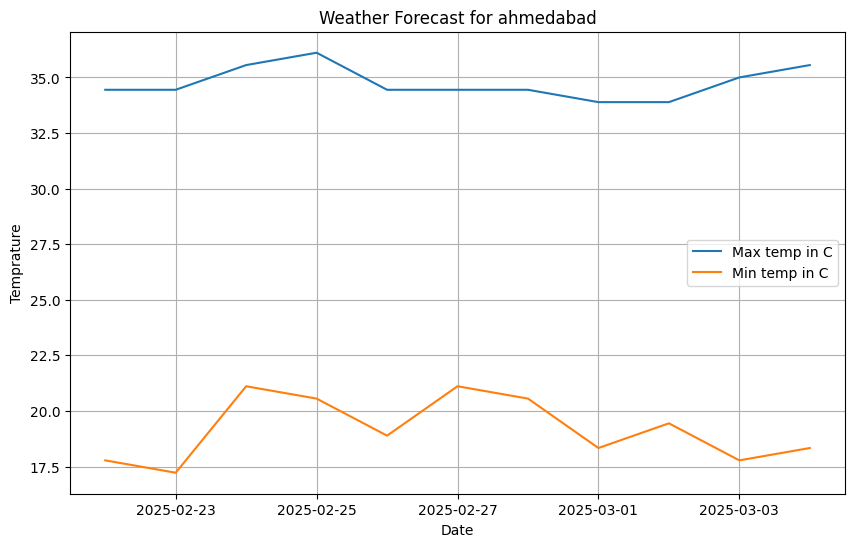

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='date',y='max_temp',label="Max temp in C")
sns.lineplot(data=df,x='date',y='min_temp',label="Min temp in C")

plt.xlabel("Date")
plt.ylabel("Temprature")
plt.title("Weather Forecast for ahmedabad")
# plt.legend()
plt.grid()
plt.show()

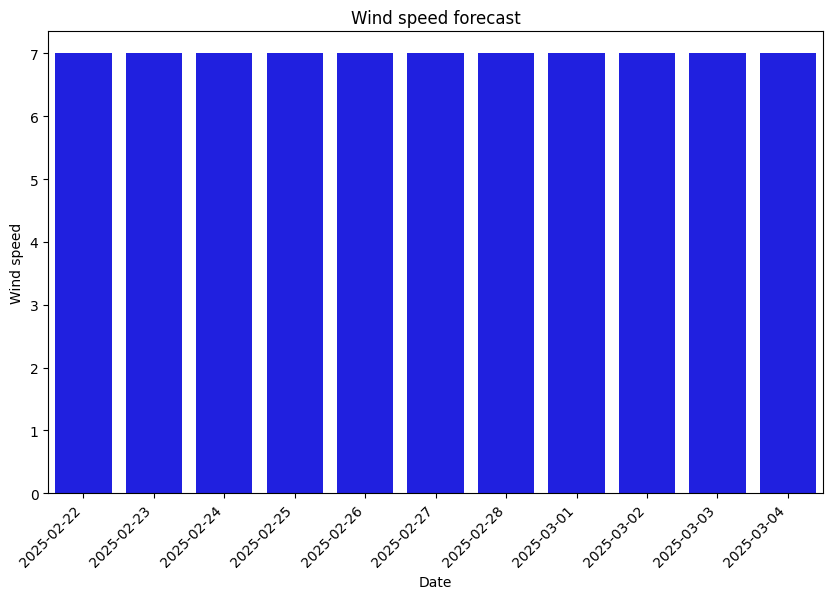

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='date',y='wind_speed',color='blue',dodge=True)
plt.xlabel("Date")
plt.ylabel("Wind speed")
plt.title("Wind speed forecast")
plt.xticks(rotation=45,ha='right')
plt.show()

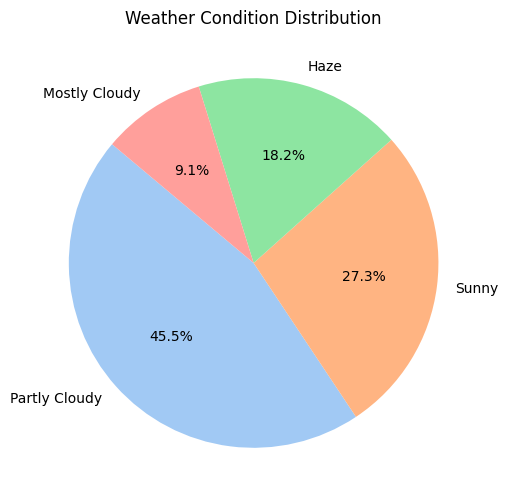

In [31]:
plt.figure(figsize=(10,6))
weather_counts=df["weather_condition"].value_counts()
colors=sns.color_palette("pastel",len(weather_counts))
plt.pie(weather_counts,labels=weather_counts.index,autopct="%1.1f%%",colors=colors,startangle=140)
plt.title("Weather Condition Distribution")
plt.show()